In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import numpy as np
import pandas as pd
#
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sklearn.metrics as mt
from sklearn.model_selection import KFold, train_test_split
from sklearn.svm import SVC
from sklearn import preprocessing

In [3]:
df=pd.read_csv("/content/drive/MyDrive/final1.csv", names=["Song","Artist", "Popularity","Dance","Energy","Acoustic","Instrumental","Happy","Speech","Live","Loud","Tempo","Id","Label"] , encoding='latin-1')
df.head(-100)

,Song,Artist,Popularity,Dance,Energy,Acoustic,Instrumental,Happy,Speech,Live,Loud,Tempo,Id,Label
0,Belle Vie De Tous Les Jours,Baudouin BÃ©ringer,61,33,1,99,93,37,5,11,-26 db,83,3irfOZS30z0snSh5vOPs2V,3
1,Bla?regn,Jacob David,64,29,13,97,95,56,17,11,-30 db,171,3a2fZ1oqZMDnjFI5ANACiz,3
2,RÃªvasser,LuciÃ©n,67,37,2,98,92,8,3,11,-34 db,119,2rBLJwsNjWvSx0yVAQLc3B,3
3,am ersten Tag,Hugo Vanbrooke,55,24,3,99,91,17,5,10,-33 db,64,2gwhISMkdlhEqEP60P93Z1,3
4,Everlasting,Cassandra Nestico,66,43,4,98,94,10,4,10,-30 db,82,6U0Rth9EM8xwmg7rtrKV3t,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2384,Lord Pretty Flacko Jodye 2 (LPFJ2),A$AP Rocky,71,49,72,1,0,5,13,5,-6 db,208,1j6kDJttn6wbVyMaM42Nxm,2
2385,Ball If I Want To,DaBaby,80,90,67,16,0,63,46,7,-5 db,140,0cu0rhnlCnJ7JIeHRiLpj3,2
2386,Plain Jane,A$AP Ferg,77,80,84,7,0,52,28,9,-5 db,170,4dVpf9jZjcORqGTLUaeYj9,2
2387,Harder Than My Demons,Big Sean,58,74,74,9,0,40,11,21,-6 db,107,23XTYrwfHXY8H1PuQYJbDA,2


In [4]:
#How many cells are missing values (NaN or None) in total?
df.isnull().sum().sum()

0

In [5]:
#How many rows are there where the attributes don't take values?
df.isnull().sum()

Song            0
Artist          0
Popularity      0
Dance           0
Energy          0
Acoustic        0
Instrumental    0
Happy           0
Speech          0
Live            0
Loud            0
Tempo           0
Id              0
Label           0
dtype: int64

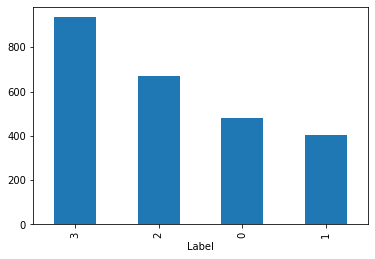

In [6]:
#How many Happy,Sad,Energetic and Calm Songs We Have
df.value_counts("Label").plot(kind="bar")

In [7]:
print('Proportion of the classes in the data:')
print(df['Label'].value_counts() / len(df))

Proportion of the classes in the data:
3    0.375653
2    0.269586
0    0.193250
1    0.161511
Name: Label, dtype: float64


In [8]:
df_dropped= df.drop(['Song',"Artist","Popularity","Loud","Id"], axis = 1)
X = np.array(df_dropped.loc[:, df_dropped.columns != 'Label'])
y = np.array(df_dropped.loc[:, df_dropped.columns == 'Label']).reshape(-1, 1)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2, shuffle = True, stratify = y)

In [10]:
# import logistic regression model and accuracy_score metric
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(solver = 'lbfgs')

In [11]:
# fit the model
clf.fit(X_train, y_train.ravel())

# prediction for training dataset
train_pred = clf.predict(X_train)

# prediction for testing dataset
test_pred = clf.predict(X_test)

print('Accuracy score for Training Dataset = ', accuracy_score(train_pred, y_train))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred, y_test))



Accuracy score for Training Dataset =  0.8065380493033226
Accuracy score for Testing Dataset =  0.8057784911717496


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [12]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train.ravel(), train_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted    0    1    2    3   All
True                               
0          194   10  156    1   361
1            9  255   33    4   301
2          129   15  359    0   503
3            0    4    0  697   701
All        332  284  548  702  1866


In [13]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test.ravel(), test_pred.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted   0   1    2    3  All
True                            
0          58   3   59    0  120
1           3  84   11    3  101
2          33   7  128    0  168
3           0   2    0  232  234
All        94  96  198  235  623


In [14]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

In [15]:
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())

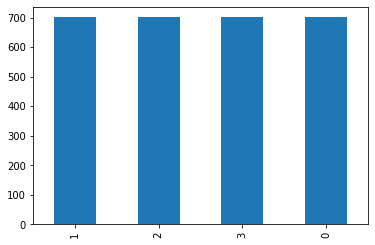

In [16]:
pd.Series(y_train_new).value_counts().plot.bar()

In [17]:
# fit the model
clf.fit(X_train_new, y_train_new)

# prediction for Training data
train_pred_sm = clf.predict(X_train_new)

# prediction for Testing data
test_pred_sm = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [18]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_sm, y_train_new))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_sm, y_test))

Accuracy score for Training Dataset =  0.796718972895863
Accuracy score for Testing Dataset =  0.8057784911717496


In [19]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_new, train_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted    0    1    2    3   All
True                               
0          541   27  133    0   701
1           25  617   52    7   701
2          294   25  382    0   701
3            0    7    0  694   701
All        860  676  567  701  2804


In [20]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test.ravel(), test_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted    0   1    2    3  All
True                             
0           75   4   41    0  120
1            7  85    6    3  101
2           50   8  110    0  168
3            0   2    0  232  234
All        132  99  157  235  623


In [21]:
df.Label.unique()
label_to_text={0:"happiness",1:"sadness",2:"Energetic",3:"calm"}

In [22]:
df_10k=pd.read_csv("/content/drive/MyDrive/son10k.csv", names=["SONG",	"ARTIST",	"ALBUM",	"DANCE",	"ENERGY",	"ACOUSTIC",	"INSTRUMENTAL",	"HAPPY",	"SPEECH"	,"LIVE"	,"TEMPO"	,"ID"] , encoding='latin-1')
df_10k.head(-100)

,SONG,ARTIST,ALBUM,DANCE,ENERGY,ACOUSTIC,INSTRUMENTAL,HAPPY,SPEECH,LIVE,TEMPO,ID
0,Good Feeling,Duvall-Sam Gray,Good Feeling,69,85,1,0,50,3,17,125,1h4zfNDe8UapUvTuaDsTuM
1,I-m Every Woman - From -Black History Always /...,Tinashe-TOKiMONSTA,I-m Every Woman (From -Black History Always / ...,79,76,13,2,64,5,8,115,7v5AEwuaQurzjaOwOzFVdo
2,I Just Wanna Dance,Coldabank-Freedo,I Just Wanna Dance,74,91,2,2,15,13,22,125,1LsoAswipJvPzdcSnoQ46C
3,Sinner,LP Giobbi-Bklava,Sinner,72,78,5,8,73,4,14,127,3kyskiCpYM2ALQUSEShFMY
4,Everything-s Gonna Be Alright (feat. London Co...,Mark Knight-Beverley Knight-London Community G...,Everything-s Gonna Be Alright (feat. London Co...,62,94,1,0,66,7,70,124,6e9zuRnA4Vsg3PO6I1CMte
...,...,...,...,...,...,...,...,...,...,...,...,...
9208,Materialistic,aCATnamedFELIX-Zack Gray,Materialistic,74,42,68,0,47,8,11,118,6MrlZRPDyAfiOTXjmyqXYK
9209,mononoke,daredvl,mononoke,57,63,4,95,27,5,11,109,3GYPEN9EE2QM3imQpZbRab
9210,She,ill Snek,She,72,54,5,0,60,9,18,156,2R220D6g6O69cKMsjyRzDB
9211,Deception,lilheartbreak,Deception,53,49,27,0,36,4,8,150,17OYmjqsdj0IczGfVfqWCN


In [23]:
df_10k_modified=df_10k[[	"DANCE",	"ENERGY",	"ACOUSTIC",	"INSTRUMENTAL",	"HAPPY",	"SPEECH"	,"LIVE"	,"TEMPO"	] ]
df_10k_modified


,DANCE,ENERGY,ACOUSTIC,INSTRUMENTAL,HAPPY,SPEECH,LIVE,TEMPO
0,69,85,1,0,50,3,17,125
1,79,76,13,2,64,5,8,115
2,74,91,2,2,15,13,22,125
3,72,78,5,8,73,4,14,127
4,62,94,1,0,66,7,70,124
...,...,...,...,...,...,...,...,...
9308,46,29,86,0,41,3,10,145
9309,47,29,90,0,17,3,9,66
9310,50,18,75,0,7,4,11,112
9311,56,26,79,0,12,3,10,110


In [24]:
df_10k.isnull().sum().sum()

0

In [25]:
LabelArray=[]
LabelArray=clf.predict(df_10k_modified.values.tolist())
print(len(LabelArray))
#clf.predict([[79, 76, 69, 0, 87, 4, 4, 130]])

9313


In [26]:
df_10k.insert(12, "Label",LabelArray , True)

In [27]:
df_10k

,SONG,ARTIST,ALBUM,DANCE,ENERGY,ACOUSTIC,INSTRUMENTAL,HAPPY,SPEECH,LIVE,TEMPO,ID,Label
0,Good Feeling,Duvall-Sam Gray,Good Feeling,69,85,1,0,50,3,17,125,1h4zfNDe8UapUvTuaDsTuM,0
1,I-m Every Woman - From -Black History Always /...,Tinashe-TOKiMONSTA,I-m Every Woman (From -Black History Always / ...,79,76,13,2,64,5,8,115,7v5AEwuaQurzjaOwOzFVdo,0
2,I Just Wanna Dance,Coldabank-Freedo,I Just Wanna Dance,74,91,2,2,15,13,22,125,1LsoAswipJvPzdcSnoQ46C,2
3,Sinner,LP Giobbi-Bklava,Sinner,72,78,5,8,73,4,14,127,3kyskiCpYM2ALQUSEShFMY,0
4,Everything-s Gonna Be Alright (feat. London Co...,Mark Knight-Beverley Knight-London Community G...,Everything-s Gonna Be Alright (feat. London Co...,62,94,1,0,66,7,70,124,6e9zuRnA4Vsg3PO6I1CMte,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9308,The Love You Left Behind,Michael Schulte,The Love You Left Behind,46,29,86,0,41,3,10,145,60wa5J6SkXtBXHySQ3PoNB,1
9309,Lost,Kris Allen,Horizons,47,29,90,0,17,3,9,66,3nBmy2hAqIDmMOD0VZGB7I,1
9310,In My Head,Peter Manos,In My Head,50,18,75,0,7,4,11,112,3bne7Qit5AbHkX6kWDItYP,1
9311,Stone,Jaymes Young,Feel Something,56,26,79,0,12,3,10,110,1ezFtClxTMcS2AotqjTZX5,1


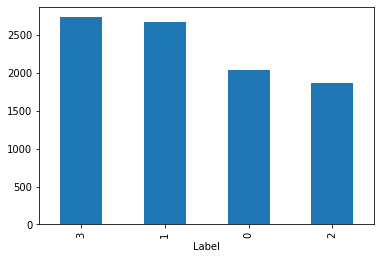

In [28]:
df_10k.value_counts("Label").plot(kind="bar")

In [29]:
#df_10k.to_excel("10k.xlsx")  